In [154]:
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import plotly.graph_objects as go

In [155]:
with open("./results.json", "r") as file:
    result_file = json.loads(file.read())

In [156]:
import re
result_df = pd.json_normalize(result_file)
result_df.rename(columns=lambda c: re.sub(r'^simulation_results.', '', c), inplace=True)
result_df.rename(columns=lambda c: re.sub(r'^simulation_config.', '', c), inplace=True)
result_df.sort_values(by='expected_throughput', ignore_index=True, inplace=True)
result_df

,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,controller_config.hidden_layer_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,8000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.295387,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
455,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.292995,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
456,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.287892,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
457,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,128,...,1000000,5,3.0,0.3,0.275408,0.097170,"[0.0, 0.05052515851478127, 0.06058793758223672...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [157]:
result_df.columns

Index(['completed_training_steps', 'controller',
       'controller_config.reward_function', 'controller_config.epsilon_start',
       'controller_config.epsilon_end', 'controller_config.learning_rate',
       'controller_config.gamma', 'controller_config.memory_size',
       'controller_config.batch_size', 'controller_config.hidden_layer_size',
       'controller_config.num_hidden_layers',
       'controller_config.target_network_update_rate',
       'controller_config.optimizing_rate', 'model_file', 'state',
       'mission_size', 'num_agents', 'sensor_generation_frequency',
       'sensor_generation_probability', 'sensor_packet_lifecycle',
       'simulation_steps', 'training', 'step_by_step', 'plots', 'verbose',
       'repetitions', 'campaign_config.training_steps',
       'campaign_config.testing_steps',
       'campaign_config.live_testing_frequency',
       'campaign_config.testing_repetitions', 'max_possible_throughput',
       'expected_throughput', 'avg_throughput', 'control

In [158]:
result_df.reset_index(inplace=True, names='campaign_id')
result_df.head()

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,campaign_config.live_testing_frequency,campaign_config.testing_repetitions,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins
0,0,1000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,1000000,5,3.0,0.3,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
1,1,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,1000000,5,3.0,0.3,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
2,2,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,1000000,5,3.0,0.3,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
3,3,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,1000000,5,3.0,0.3,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."
4,4,8000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,1000000,5,3.0,0.3,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30..."


In [159]:
import warnings
with warnings.catch_warnings():
    # Converting columns to numeric to improve visibility in graphs
    warnings.simplefilter("ignore")
    result_df['maximum_simulation_steps'] = pd.to_numeric(result_df['completed_training_steps'])
    result_df['mission_size'] = pd.to_numeric(result_df['mission_size'])
    result_df['num_agents'] = pd.to_numeric(result_df['num_agents'])
    result_df['score'] = result_df['avg_throughput'] / result_df['expected_throughput']

# Analysing Q Learning training performance

In [160]:
# Plot configurations
grid_row_column = 'mission_size'
grid_col_column = 'num_agents'
grid_hue_column = 'repetitions'
result_df = result_df[result_df['campaign_config.training_steps'] == 10_000_000]
result_df = result_df[result_df['controller_config.target_network_update_rate'] == 10_000]

result_df

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
24,24,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.291408,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",7000000,0.971359
27,27,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.290847,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",7000000,0.969490
28,28,7000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.301273,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",7000000,1.004242
31,31,8000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.295157,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",8000000,0.983857
32,32,8000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.297860,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",8000000,0.992867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,454,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.295387,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",4000000,0.984622
455,455,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.292995,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",4000000,0.976650
456,456,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.287892,0.111000,"[0.0, 0.0316374269005848, 0.07944949475534183,...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",4000000,0.959639
457,457,4000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.275408,0.097170,"[0.0, 0.05052515851478127, 0.06058793758223672...",[0.0],[0.0],"[0.0, 10.01001001001001, 20.02002002002002, 30...",4000000,0.918028


In [161]:
q_learning_testing = result_df[~result_df['training']]

In [162]:
def grid_comparison_plot(df: pd.DataFrame, title: str, x: str, y: str):
    grid = sns.FacetGrid(df, row=grid_row_column, col=grid_col_column, aspect=2)

    unique_hue_values = df[grid_hue_column].nunique()

    grid.map_dataframe(sns.lineplot, x=x, y=y, hue=grid_hue_column, palette=sns.color_palette('Set2', n_colors=unique_hue_values))

    grid.add_legend()

    grid.fig.subplots_adjust(top=0.8)
    grid.fig.suptitle(title, fontsize=16)

    plt.tight_layout()

    plt.show()

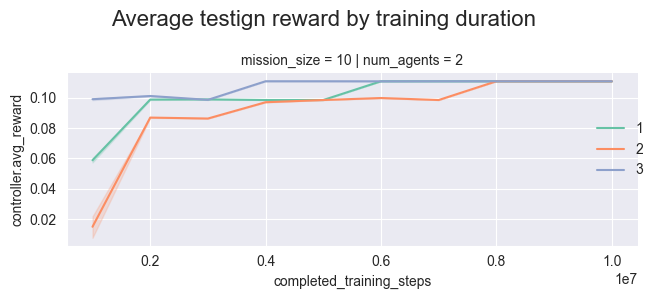

In [163]:
grid_comparison_plot(q_learning_testing, "Average testign reward by training duration", x='completed_training_steps', y='controller.avg_reward')

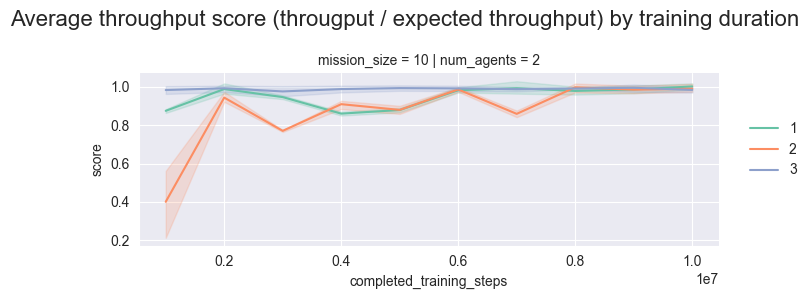

In [164]:
grid_comparison_plot(q_learning_testing, 'Average throughput score (througput / expected throughput) by training duration', x='completed_training_steps', y='score')

In [165]:
q_learning_training = result_df[result_df['training']]
q_learning_training

,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,controller_config.batch_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300220,0.056910,"[0.021693898154261183, 0.021454442319468112, 0...","[0.00012050792360532796, 0.0002316329663332479...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,1.000735
166,166,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300157,0.055526,"[0.021672450374280366, 0.021428602105562237, 0...","[0.00010220309190553963, 0.0002100340911150313...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,1.000522
458,458,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,128,...,3.0,0.3,0.300309,0.056238,"[0.02169410776303837, 0.021365782353607362, 0....","[8.842455330632219e-05, 0.00018135630889003188...","[0.9988494755977144, 0.9965521855525032, 0.994...","[0.0, 10010.01001001001, 20020.02002002002, 30...",10000000,1.001030


In [166]:
q_learning_training_exploded = q_learning_training.explode(['controller.cum_avg_rewards', 'controller.losses', 'controller.epsilons', 'controller.step_bins'])
q_learning_training_exploded.reset_index(names='step', inplace=True)
q_learning_training_exploded

,step,campaign_id,completed_training_steps,controller,controller_config.reward_function,controller_config.epsilon_start,controller_config.epsilon_end,controller_config.learning_rate,controller_config.gamma,controller_config.memory_size,...,max_possible_throughput,expected_throughput,avg_throughput,controller.avg_reward,controller.cum_avg_rewards,controller.losses,controller.epsilons,controller.step_bins,maximum_simulation_steps,score
0,127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300220,0.056910,0.021694,0.000121,0.998849,0.0,10000000,1.000735
1,127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300220,0.056910,0.021454,0.000232,0.996552,10010.01001,10000000,1.000735
2,127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300220,0.056910,0.021041,0.000377,0.99426,20020.02002,10000000,1.000735
3,127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300220,0.056910,0.021038,0.000516,0.991973,30030.03003,10000000,1.000735
4,127,127,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300220,0.056910,0.020977,0.000636,0.989692,40040.04004,10000000,1.000735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2992,458,458,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300309,0.056238,0.05607,0.000259,0.101274,9949949.94995,10000000,1.001030
2993,458,458,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300309,0.056238,0.056099,0.000273,0.101042,9959959.95996,10000000,1.001030
2994,458,458,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300309,0.056238,0.056129,0.000281,0.100809,9969969.96997,10000000,1.001030
2995,458,458,10000000,<class 'DQNLearner.DQNLearner'>,smooth_unique_packets,1,0.1,0.0005,0.99,10000,...,3.0,0.3,0.300309,0.056238,0.05616,0.000285,0.100577,9979979.97998,10000000,1.001030


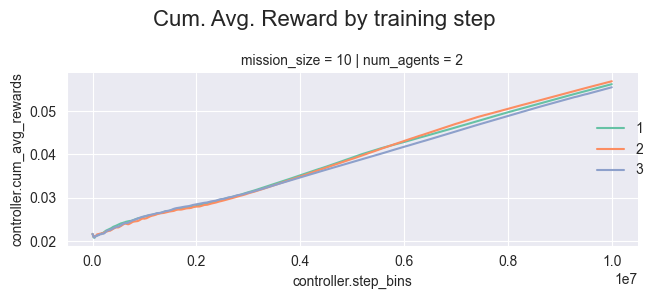

In [167]:
grid_comparison_plot(q_learning_training_exploded, 'Cum. Avg. Reward by training step', x='controller.step_bins', y='controller.cum_avg_rewards')

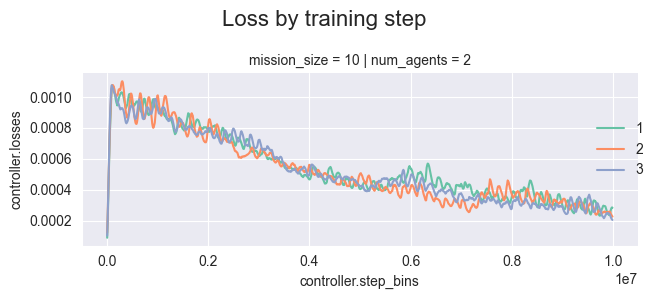

In [168]:
grid_comparison_plot(q_learning_training_exploded, 'Loss by training step', x='controller.step_bins', y='controller.losses')

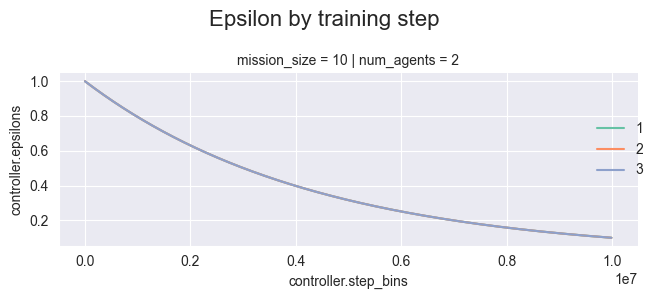

In [169]:
grid_comparison_plot(q_learning_training_exploded, 'Epsilon by training step', x='controller.step_bins', y='controller.epsilons')